In [ ]:
# Test fe18 stuff with the different degradation factors
# 
# For the Sep 2018 data
# 
# 14-Sep-2020 IGH

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import astropy.time as atime
from astropy.coordinates import SkyCoord
from astropy import units as u
import scipy.io as io

import sunpy.map

from aiapy.calibrate import degradation
from aiapy.calibrate.util import get_correction_table
from aiapy.calibrate import register, update_pointing

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Let's get the degradation correction factors for v8 and v9
channels = [94, 171, 211] * u.angstrom
time=atime.Time('2018-09-09T09:15:00', scale='utc')
print(channels)
print(time.isot)

[ 94. 171. 211.] Angstrom
2018-09-09T09:15:00.000


In [4]:
# # Need to manually pull out the v8 and v9 version
# nc=len(channels)
# degs8=np.empty(nc)
# degs9=np.empty(nc)
# # Bit slow but cant see how to do this via the calibration tables
# for i in np.arange(nc):
#     degs8[i]=degradation(channels[i],time,calibration_version=8)
#     degs9[i]=degradation(channels[i],time,calibration_version=9)
# print(degs8,degs9)

In [5]:
# Just have the numbers here manually as faster the next time and can above above cell
degs8=np.array([0.74183735, 0.75479493, 0.69658929])
degs9=np.array([0.93609983,0.73458129,0.5770613 ])

print(degs8,degs9)

[0.74183735 0.75479493 0.69658929] [0.93609983 0.73458129 0.5770613 ]


In [6]:
# Now load in the fits files
fdir='/Users/iain/Downloads/' 
f094=fdir+'aia.lev1.94A_2018-09-09T09_14_47.13Z.image_lev1.fits'
f171=fdir+'aia.lev1.171A_2018-09-09T09_14_57.34Z.image_lev1.fits'
f211=fdir+'aia.lev1.211A_2018-09-09T09_14_57.62Z.image_lev1.fits'

In [7]:
# m094 = sunpy.map.Map(f094)
# m094_updated_pointing = update_pointing(m094)
# m094_reg = register(m094_updated_pointing)
# bottom_left = SkyCoord(270 * u.arcsec, 20 * u.arcsec, frame=m094_reg.coordinate_frame)
# top_right = SkyCoord(390 * u.arcsec, 140 * u.arcsec, frame=m094_reg.coordinate_frame)
# m094_smap = m094_reg.submap(bottom_left, top_right=top_right)
# m094_smap.save(fdir+'a094_20180909_submap.fits',overwrite='True')

# m171 = sunpy.map.Map(f171)
# m171_updated_pointing = update_pointing(m171)
# m171_reg = register(m171_updated_pointing)
# bottom_left = SkyCoord(270 * u.arcsec, 20 * u.arcsec, frame=m171_reg.coordinate_frame)
# top_right = SkyCoord(390 * u.arcsec, 140 * u.arcsec, frame=m171_reg.coordinate_frame)
# m171_smap = m171_reg.submap(bottom_left, top_right=top_right)
# m171_smap.save(fdir+'a171_20180909_submap.fits',overwrite='True')

# m211 = sunpy.map.Map(f211)
# m211_updated_pointing = update_pointing(m211)
# m211_reg = register(m211_updated_pointing)
# bottom_left = SkyCoord(270 * u.arcsec, 20 * u.arcsec, frame=m211_reg.coordinate_frame)
# top_right = SkyCoord(390 * u.arcsec, 140 * u.arcsec, frame=m211_reg.coordinate_frame)
# m211_smap = m211_reg.submap(bottom_left, top_right=top_right)
# m211_smap.save(fdir+'a211_20180909_submap.fits',overwrite='True')


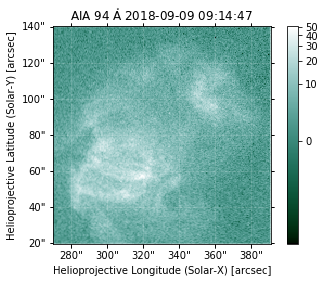

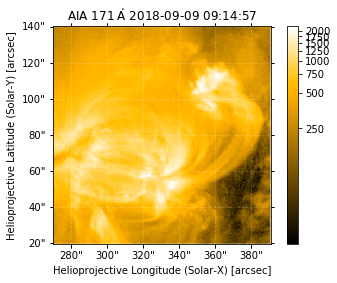

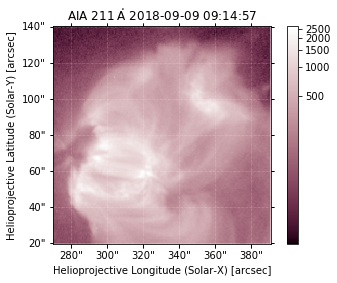

In [8]:
# Load back in the submaps and check look ok
mp094=sunpy.map.Map(fdir+'a094_20180909_submap.fits')
mp171=sunpy.map.Map(fdir+'a171_20180909_submap.fits')
mp211=sunpy.map.Map(fdir+'a211_20180909_submap.fits')

mp094.peek()
mp171.peek()
mp211.peek()


In [9]:
# Extract the data from the maps
data094=mp094.data/mp094.exposure_time.value
data171=mp171.data/mp171.exposure_time.value
data211=mp211.data/mp211.exposure_time.value
data094[data094 <0] = 0
data171[data171 <0] = 0
data211[data211 <0] = 0

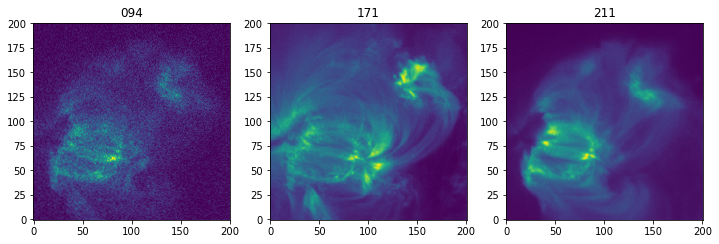

In [10]:
fig, ax = plt.subplots(1, 3,figsize=(12, 4))
ax[0].imshow(data094,origin='lower')
ax[0].set_title('094')
ax[1].imshow(data171,origin='lower')
ax[1].set_title('171')
ax[2].imshow(data211,origin='lower')
ax[2].set_title('211')
plt.show()

In [11]:
# Make the degradation corrections
data094v8=data094/degs8[0]
data171v8=data171/degs8[1]
data211v8=data211/degs8[2]

data094v9=data094/degs9[0]
data171v9=data171/degs9[1]
data211v9=data211/degs9[2]

In [12]:
# Work out the Fe18
datafe18v8=data094v8 - data171v8/450. - data211v8/120.
datafe18v8[datafe18v8 < 0]=0
datafe18v9=data094v9 - data171v9/450. - data211v9/120.
datafe18v9[datafe18v9 < 0]=0

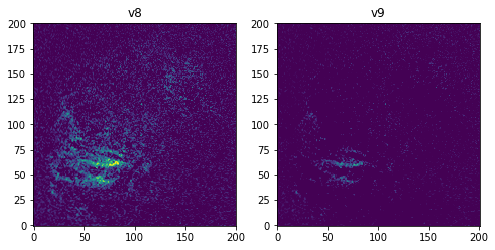

In [13]:
fig, ax = plt.subplots(1, 2,figsize=(8, 4))
ax[0].imshow(datafe18v8,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[0].set_title('v8')
ax[1].imshow(datafe18v9,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[1].set_title('v9')
plt.show()

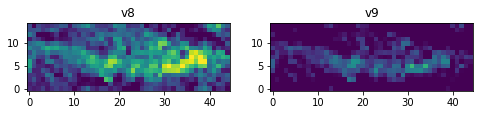

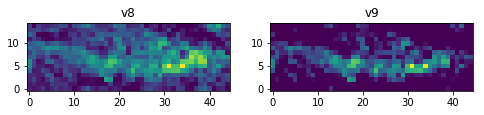

In [21]:
loopv8=datafe18v8[55:70,45:90]
loopv9=datafe18v9[55:70,45:90]
fig, ax = plt.subplots(1, 2,figsize=(8, 4))
ax[0].imshow(loopv8,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[0].set_title('v8')
ax[1].imshow(loopv9,origin='lower',norm=colors.Normalize(vmin=0.01,vmax=10))
ax[1].set_title('v9')
plt.show()

fig, ax = plt.subplots(1, 2,figsize=(8, 4))
ax[0].imshow(loopv8,origin='lower',\
             norm=colors.Normalize(vmin=np.min(loopv8[loopv8>0]),vmax=np.max(loopv8)))
ax[0].set_title('v8')
ax[1].imshow(loopv9,origin='lower',\
             norm=colors.Normalize(vmin=np.min(loopv9[loopv9>0]),vmax=np.max(loopv9)))
ax[1].set_title('v9')
plt.show()

In [22]:
print('<v8 DN/s/px>: ',np.mean(loopv8))
print('<v9 DN/s/px>: ',np.mean(loopv9))
print('Ratio v8/v9: ',np.mean(loopv8)/np.mean(loopv9))

print('<v8 pos DN/s/px>: ',np.mean(loopv8[loopv8 >0]))
print('<v9 pos DN/s/px>: ',np.mean(loopv9[loopv9 >0]))
print('Ratio v8/v9 pos: ',np.mean(loopv8[loopv8 >0])/np.mean(loopv9[loopv9 >0]))

<v8 DN/s/px>:  3.1556429497678073
<v9 DN/s/px>:  0.7630006200190124
Ratio v8/v9:  4.135832746360252
<v8 pos DN/s/px>:  3.349149357064889
<v9 pos DN/s/px>:  1.6144997445543363
Ratio v8/v9 pos:  2.074419254856793


In [23]:
# Load in the responses
trinv8=io.readsav('aia_trespv8_en.dat')
trinv9=io.readsav('aia_trespv9_en.dat')
logt=trinv8['logt']
trv8094=trinv8['tr'][0]
trv8171=trinv8['tr'][2]
trv8211=trinv8['tr'][4]

trv9094=trinv9['tr'][0]
trv9171=trinv9['tr'][2]
trv9211=trinv9['tr'][4]

trfe18v8=trv8094 - trv8171/450. - trv8211/120.
trfe18v9=trv9094 - trv9171/450. - trv9211/120.
trfe18v8[trfe18v8 <0]=0
trfe18v9[trfe18v9 <0]=0

In [24]:
# work out the synthetic fluxes from the NuSTAR T and EM for this event (but v noisy)
T=4e6
EM=5.8e45 # cm^-3
nx,ny=loopv9.shape
dx=mp094.meta['cdelt1']
dy=mp094.meta['cdelt2']
area=nx*dx*725e5*ny*dy*725e5
print(area, '[cm^2]')
gfe18v8=EM*10**np.interp(np.log10(T),logt,np.log10(trfe18v8))/area
gfe18v9=EM*10**np.interp(np.log10(T),logt,np.log10(trfe18v9))/area

print(gfe18v8,gfe18v9,'[DN/s/px]')
print('Ratio v8/v9 syn fluxes: ',gfe18v8/gfe18v9)

1.27726875e+18 [cm^2]
4.251163167020889 3.9859263739721538 [DN/s/px]
Ratio v8/v9 syn fluxes:  1.0665433247289047


In [25]:
# Very rough calc from the above areas
print('v8')
print(gfe18v8,'[DN/s/px]')
print('Syn: ',round(gfe18v8,2))
print('Obs: ',round(np.mean(loopv8),2))
print('Syn/obs: ',gfe18v8/np.mean(loopv8))
print('v9')
print(gfe18v9,'[DN/s/px]')
print('Syn: ',round(gfe18v9,2))
print('Obs: ',round(np.mean(loopv9),2))
print('Syn/obs: ',gfe18v9/np.mean(loopv9))

v8
4.251163167020889 [DN/s/px]
Syn:  4.25
Obs:  3.16
Syn/obs:  1.347162285053095
v9
3.9859263739721538 [DN/s/px]
Syn:  3.99
Obs:  0.76
Syn/obs:  5.224014593687792


In [26]:
# What about with just the "excess" temperature
T=4.42e6
EM=1.873e45 # cm^-3
nx,ny=loopv9.shape
dx=mp094.meta['cdelt1']
dy=mp094.meta['cdelt2']
area=nx*dx*725e5*ny*dy*725e5
print(area, '[cm^2]')
gfe18v8=EM*10**np.interp(np.log10(T),logt,np.log10(trfe18v8))/area
gfe18v9=EM*10**np.interp(np.log10(T),logt,np.log10(trfe18v9))/area

print(gfe18v8,gfe18v9,'[DN/s/px]')
print('Ratio v8/v9 syn fluxes: ',gfe18v8/gfe18v9)

1.27726875e+18 [cm^2]
2.020125093178246 1.896333680652742 [DN/s/px]
Ratio v8/v9 syn fluxes:  1.0652793407555223


In [27]:
# Very rough calc from the above areas
print('v8')
print(gfe18v8,'[DN/s/px]')
print('Syn: ',round(gfe18v8,2))
print('Obs: ',round(np.mean(loopv8),2))
print('Syn/obs: ',gfe18v8/np.mean(loopv8))
print('v9')
print(gfe18v9,'[DN/s/px]')
print('Syn: ',round(gfe18v9,2))
print('Obs: ',round(np.mean(loopv9),2))
print('Syn/obs: ',gfe18v9/np.mean(loopv9))

v8
2.020125093178246 [DN/s/px]
Syn:  2.02
Obs:  3.16
Syn/obs:  0.6401627577438339
v9
1.896333680652742 [DN/s/px]
Syn:  1.9
Obs:  0.76
Syn/obs:  2.485363223696318
